<a href="https://colab.research.google.com/github/apolaf44/GeneralRepository/blob/main/TP4/Clasificador_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos dependencias

In [49]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/LICENSE.txt
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/libdivide.h
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/random

In [50]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 438 kB 46.8 MB/s 
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
     |████████████████████████████████| 5.8 MB 37.4 MB/s 
  Using cached tensorflow_gpu-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfull

Cargamos las dependencias

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


# **2. Creamos Funciones para cargar la Data**

2.1 Definir Paths a Files

In [38]:
Capuchino_file = os.path.join('DATA' , '/content/DATA/Capuchinos Clips' , 'XC3776-3.wav' )
No_Capuchino_file = os.path.join('DATA' , '/content/DATA/No Capuchinos' , 'afternoon-birds-song-in-forest-0.wav')

In [39]:
No_Capuchino_file

'/content/DATA/No Capuchinos/afternoon-birds-song-in-forest-0.wav'

In [11]:
len(No_Capuchino_file)

65

In [40]:
def load_wav_16k_mono(filename):
  # Cargamos las carpetas wav 
  file_contents = tf.io.read_file(filename)
  # Decodificamos a  y en Mono
  wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)
  # Removemos Axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate , dtype=tf.int64)
  # Va desde 44100Hz a 16000Hz - Amplitud de la señal de audio
  wav = tfio.audio.resample(wav , rate_in=44100 , rate_out=16000)
  return wav


In [33]:
load_wav_16k_mono

<function __main__.load_wav_16k_mono>

In [18]:
# En este caso solo nos trae los archivos convertidos en Strings
file_contents = tf.io.read_file(Capuchino_file)

In [19]:
 # Aqui decodificamos a Wav neustros arcivhos y que sea de 1 canal = Mono
 wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)

In [9]:
# Nos trae la Amplitud 
#len(wav)
wav

NameError: ignored

2.3 Plot Wave

In [41]:
wave = load_wav_16k_mono(Capuchino_file)

In [42]:
nwave = load_wav_16k_mono(No_Capuchino_file)

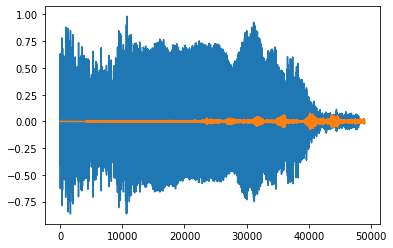

In [43]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

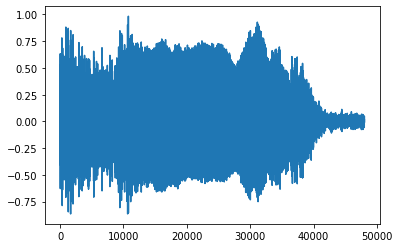

In [44]:
plt.plot(wave)


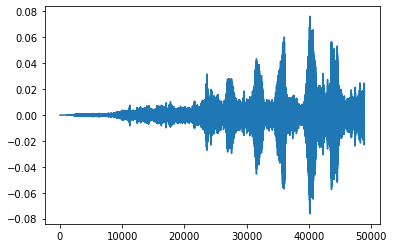

In [45]:
plt.plot(nwave)

# **3.Creacion Dataset con Tensorflow**

 3.1 Definimos Paths para Data positiva y negativa

In [56]:
POS = os.path.join('DATA' , '/content/DATA/Capuchinos Clips')
NEG = os.path.join('DATA' , '/content/DATA/No Capuchinos' )

In [57]:
POS

'/content/DATA/Capuchinos Clips'

3.2 Creamos Tensorflow Datasets

In [66]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')